######  <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#35c337">Support Vector Machine (SVM) Linear

######  <span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#a9c335">Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

######  <span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#35b7c3">Loading dataset

In [2]:
datasets = pd.read_csv('~/Downloads/ML_classwork/Week7_srrt/Social_Network_Ads.csv')
X_clmns = datasets.iloc[:, [2,3]].values
y_clmns = datasets.iloc[:, 4].values

In [3]:
datasets

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


######  <span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#3591c3">Visualizations

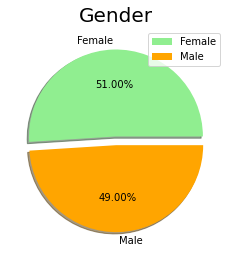

In [4]:
labels = ['Female', 'Male']
size = datasets['Gender'].value_counts()
colors = ['lightgreen', 'orange']
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (4, 4)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

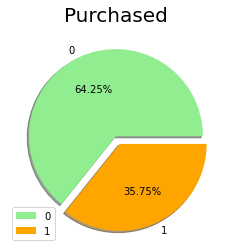

In [5]:
labels = ['0', '1']
size = datasets['Purchased'].value_counts()
colors = ['lightgreen', 'orange']
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (4, 4)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Purchased', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

######  <span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#3556c3">Support Vector Machine (SVM)

In [6]:
#Linear support Vector Machine (SVM)
# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_clmns, y_clmns, test_size=0.2,random_state = 0)

######  <span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#3c35c3">Support Vector Machine (SVM)

In [7]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [8]:
# Fitting the classifier into the Training set

from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [9]:
# Predicting the test set results

y_pred = classifier.predict(X_test)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


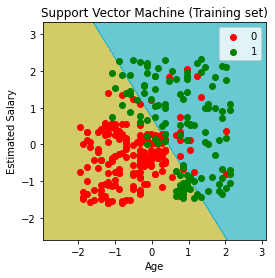

In [10]:
# Visualising the Training set results

from matplotlib.colors import ListedColormap
X_Set, Y_Set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_Set[:, 0].min() - 1, stop = X_Set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_Set[:, 1].min() - 1, stop = X_Set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('#c3ba35', '#35b7c3')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_Set)):
    plt.scatter(X_Set[Y_Set == j, 0], X_Set[Y_Set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Support Vector Machine (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [11]:
from sklearn.svm import LinearSVC
clf = LinearSVC().fit(X_train, y_train)
print('Social Network dataset')
print('Accuracy of Linear SVC on training set - Known data: {:.3f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Linear SVC on test set - Unknown data: {:.3f}'
     .format(clf.score(X_test, y_test)))

Social Network dataset
Accuracy of Linear SVC on training set - Known data: 0.825
Accuracy of Linear SVC on test set - Unknown data: 0.925


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

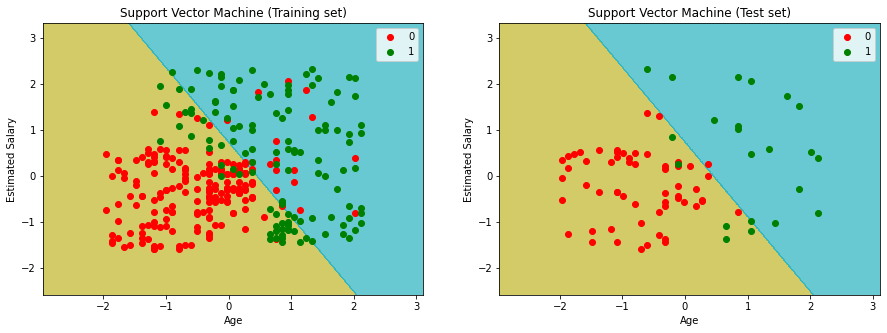

In [12]:
f, (ax1,ax2) = plt.subplots(ncols=2, figsize=(15, 5))

X_Set, Y_Set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_Set[:, 0].min() - 1, stop = X_Set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_Set[:, 1].min() - 1, stop = X_Set[:, 1].max() + 1, step = 0.01))
ax1.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('#c3ba35', '#35b7c3')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_Set)):
    ax1.scatter(X_Set[Y_Set == j, 0], X_Set[Y_Set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
ax1.set_title('Support Vector Machine (Training set)')
ax1.set_xlabel('Age')
ax1.set_ylabel('Estimated Salary')
ax1.legend()
    
xx_Set, yy_Set = X_test, y_test
XX1, XX2 = np.meshgrid(np.arange(start = xx_Set[:, 0].min() - 1, stop = xx_Set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = xx_Set[:, 1].min() - 1, stop = xx_Set[:, 1].max() + 1, step = 0.01))
ax2.contourf(XX1, XX2, classifier.predict(np.array([XX1.ravel(), XX2.ravel()]).T).reshape(XX1.shape),
             alpha = 0.75, cmap = ListedColormap(('#c3ba35', '#35b7c3')))
for i, j in enumerate(np.unique(yy_Set)):
    ax2.scatter(xx_Set[yy_Set == j, 0], xx_Set[yy_Set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
ax2.set_title('Support Vector Machine (Test set)')
ax2.set_xlabel('Age')
ax2.set_ylabel('Estimated Salary')
ax2.legend()
plt.show()

In [ ]:
# $Support Vector Machine Linear and C value

In [28]:
from sklearn.svm import SVC
this_C = 0.001
classifiern = SVC(kernel = 'linear', C=this_C)
classifiern.fit(X_train, y_train)

SVC(C=0.001, kernel='linear')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


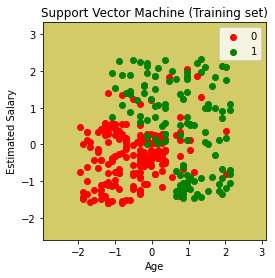

In [29]:
from matplotlib.colors import ListedColormap
X_Set, Y_Set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_Set[:, 0].min() - 1, stop = X_Set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_Set[:, 1].min() - 1, stop = X_Set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifiern.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('#c3ba35', '#35b7c3')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_Set)):
    plt.scatter(X_Set[Y_Set == j, 0], X_Set[Y_Set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Support Vector Machine (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()